In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('diabetes.csv', index_col=0)
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
8,183,64,0,0,23.3,0.672,32,1
1,89,66,23,94,28.1,0.167,21,0
0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
10,101,76,48,180,32.9,0.171,63,0
2,122,70,27,0,36.8,0.340,27,0
5,121,72,23,112,26.2,0.245,30,0


## DATA UNDERSTANDING

In [3]:
print("Data Shape : ", df.shape)

Data Shape :  (768, 8)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 6 to 1
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   BloodPressure             768 non-null    int64  
 2   SkinThickness             768 non-null    int64  
 3   Insulin                   768 non-null    int64  
 4   BMI                       768 non-null    float64
 5   DiabetesPedigreeFunction  768 non-null    float64
 6   Age                       768 non-null    int64  
 7   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [5]:
df[['BloodPressure', 'Insulin', 'BMI', 'Age']].describe()

,BloodPressure,Insulin,BMI,Age
count,768.000000,768.000000,768.000000,768.000000
mean,69.105469,79.799479,31.992578,33.240885
std,19.355807,115.244002,7.884160,11.760232
min,0.000000,0.000000,0.000000,21.000000
25%,62.000000,0.000000,27.300000,24.000000
50%,72.000000,30.500000,32.000000,29.000000
75%,80.000000,127.250000,36.600000,41.000000
max,122.000000,846.000000,67.100000,81.000000


In [6]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## 2.CLEANING DATA

In [7]:
df.isnull().sum()

Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.duplicated().sum()

0

## 3. Exploratory Data Analysis ( EDA )

C:\Users\ARUM MAULIA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


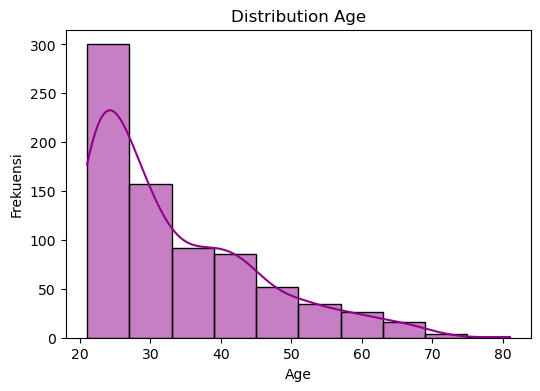

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', bins=10, kde=True, color='#91008a')

plt.title('Distribution Age')
plt.xlabel('Age')
plt.ylabel('Frekuensi')
plt.show()

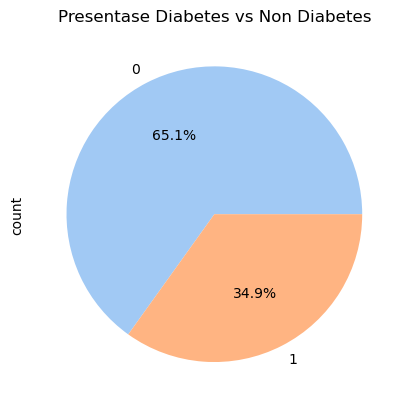

In [10]:
sns.set_palette('pastel')
df['Outcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Presentase Diabetes vs Non Diabetes')
plt.show()

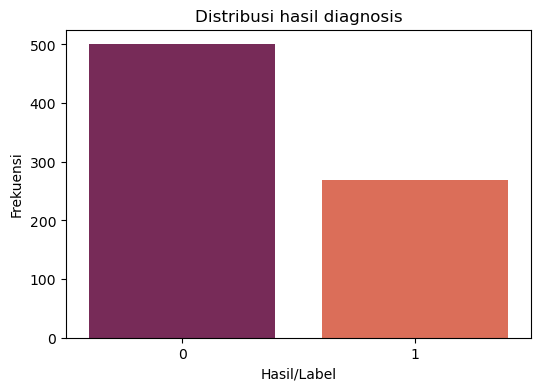

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Outcome', palette='rocket')

plt.title('Distribusi hasil diagnosis')
plt.xlabel('Hasil/Label')
plt.ylabel('Frekuensi')
plt.show()

In [12]:
df.corr()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Glucose,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

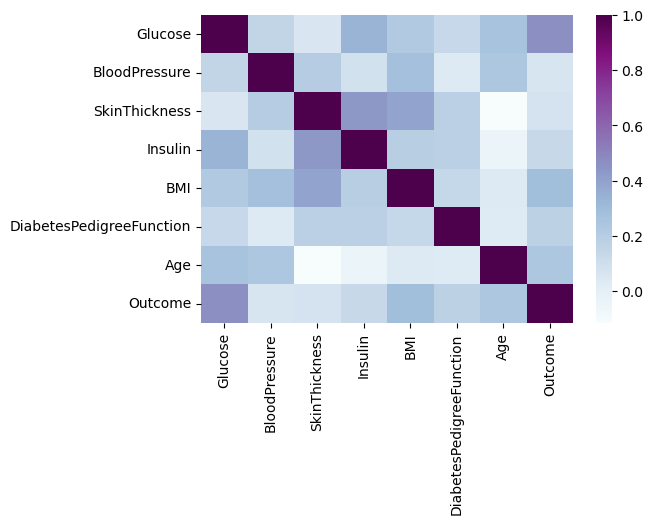

In [15]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), cmap='BuPu')

## Preparation Data 

In [12]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']

print("X : ", X.shape)
print("y : ", y.shape)

NameError: name 'df' is not defined

X = diabetes.csv.drop(columns= 'Outcome', axis=1)
y = diabetes['Outcome']

In [13]:
X = diabetes.csv.drop(columns= 'Outcome', axis=1)
y = diabetes['Outcome']

NameError: name 'diabetes' is not defined

In [2]:
import numpy as np

input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)
std_data = scaler.transform(input_data_reshape)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if prediction[0] == 0:
    print('Pasien tidak terkena diabetes')
else:
    print('Pasien terkena diabetes')


NameError: name 'scaler' is not defined

In [4]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan fitting scaler pada data latihan (misalnya X_train adalah data latihan)
scaler.fit(X_train)

# Setelah fitting, Anda dapat menggunakan scaler.transform() pada data baru

# Input data yang akan diprediksi
input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)

# Konversi input data menjadi array numpy dan ubah bentuknya agar sesuai dengan input scaler
input_data_as_numpy_array = np.array(input_data)
input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

# Normalisasi data input menggunakan scaler
std_data = scaler.transform(input_data_reshape)

# Prediksi menggunakan model klasifikasi
prediction = classifier.predict(std_data)

# Tampilkan hasil prediksi
if prediction[0] == 0:
    print('Pasien tidak terkena diabetes')
else:
    print('Pasien terkena diabetes')


NameError: name 'X_train' is not defined

In [5]:
import pandas as pd

new_data = {'Pregnancies': [6],
            'Glucose': [148],
            'BloodPressure': [72],
            'SkinThickness': [35],
            'Insulin': [0],
            'BMI': [33.6],
            'DiabetesPedigreeFunction': [0.627],
            'Age': [50]}
new_data = pd.DataFrame(new_data)

scaled_new_data = scaler.transform(new_data)
y_pred_now = classifier.predict(scaled_new_data)

if y_pred_now[0] == 0:
    print('The data does not indicate diabetes.')
else:
    print('The data indicates diabetes.')


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.